<a href="https://colab.research.google.com/github/jessicaavelar/master-dados-automacao-data-storytelling-insper/blob/main/2021_10_14_coleta_dados_breque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando a biblioteca

In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git          # Baixando biblioteca
!cd /content/twint && pip3 install . -r requirements.txt          # instalando a biblioteca - cd é chnage directory

Fazendo a conexao pra salvar o arquivo no google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')         # salvar arquivos no Google Drive -> acessar o link e copiar o código que aparece no login do Google

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exemplo

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()
import time

import os

timestr = time.strftime("%Y%m%d")

c = twint.Config()          # Instanciar o Twint
c.Limit = 500          # Quantos twites quer importar
c.Store_csv = True
c.Search = "#BrequeDosApps"
text_file = "/content/drive/My Drive/Insper/2º tri/01 - Mineração e análise de dados/Aula 01/breque.csv"
c.Output = text_file
twint.run.Search(c)

1452403831128666116 2021-10-24 22:37:12 +0000 <andante40428500> por que a maioria da esquerda partidária não está apoiando o #brequedosapps?
1452395807630667785 2021-10-24 22:05:19 +0000 <RofNight> Pessoal, como tá o #brequedosapps?
1451962017527615488 2021-10-23 17:21:35 +0000 <andante40428500> @LulaOficial fala em sindicato forte,mas nem ele,nem o @ptbrasil é nem a @CUT_Brasil estão mostrando apoio à luta que @galodeluta tem demonstrado com o pessoal do #brequedosapps. incoerência?seletividade? espero que não seja hipocrisia liberal...espero...
1451921133670916102 2021-10-23 14:39:08 +0000 <andante40428500> @CUT_Brasil @LulaOficial por que nem @LulaOficial nem a @CUT_Brasil e nem o @ptbrasil estão de fato,ombro a ombro,apoiando e ajudando a movimentação do #brequedosapps? @LulaOficial quer mudança na ação da @CUT_Brasil pós pandemia, mas tá desfazendo da luta do companheiro @galodeluta por que?
1451910644886872067 2021-10-23 13:57:27 +0000 <andante40428500> @detetivevsilva pergunta s

Fazendo uma nuvem de palavras


In [ ]:
!pip install wordcloud
!pip install pandas

Instalando mais bibliotecas que sao requisitos


In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas

Criando a nuvem de palavras

Apenas o texto dos Tuites



In [ ]:
df = pandas.read_csv(text_file, delimiter=',')
df['tweet']       # Criar estrutura de dados com os Twitter

0     por que a maioria da esquerda partidária não e...
1                    Pessoal, como tá o #brequedosapps?
2     @LulaOficial fala em sindicato forte,mas nem e...
3     @CUT_Brasil @LulaOficial por que nem @LulaOfic...
4     @detetivevsilva pergunta sincera, companheiro:...
5               #brequedosapps  https://t.co/clB92WlUpY
6                                        #BrequedosApps
7     Atibaia chega no oitavo dia de greve! #BrequeD...
8     Greve de entregadores continua em Atibaia #Bre...
9                                        #BrequeDosApps
10    Atibaia tá no sétimo dia de greve contra a @iF...
11    Coitados dos entregadores, sequer recebem as g...
12    @ptbrasil @CUT_Brasil @LulaOficial finalmente ...
13    Nós do PSTU somos solidários à luta dos trabal...
14                                       #BrequeDosApps
15    #BrequeDosApps | 🔥 Um movimento de resistência...
16    👊 #BrequeDosApps : Atibaia seguem em greve! Am...
17                                       #Breque

(-0.5, 399.5, 199.5, -0.5)

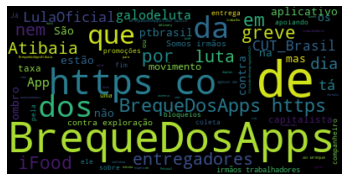

In [ ]:
  # Juntando todos tweets numa string

  tuites = ''
  for index, row in df.iterrows():
    tuites = tuites + row['tweet']
    
  # Montando a nuvem de palavras

  wordcloud = WordCloud().generate(tuites)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")